## Przedstawienie problemu

Jak możemy przeczytać na [Wikipedii](https://pl.wikipedia.org/wiki/Rak_sutka), rak piersi który jest potoczną nazwą nowotworu sutka, jest najczęstszym nowotworem złośliwym gruczołu sutkowego wywodzący się z tkanki nabłonkowej. Na świecie rak ten jest najczęściej występującym nowotworem złośliwym u kobiet. Rak sutka pojawia się także u mężczyzn, jednak jest rzadki i zwykle późno rozpoznawany.

Jeśli weźmiemy pod uwagę czynniki ryzyka można wyróżnić:

 - Płeć (99% raków sutka występuje u kobiet)
 - Czynniki geograficzne (Do obszarów, w których ryzyko raka piersi jest większe, należą Ameryka Północna i północna Europa, rzadziej występuje on w Azji i Afryce)
 - Czynniki genetyczne
 - Wiek (Ryzyko wystąpienia raka piersi wzrasta z wiekiem począwszy od 30 roku życia)
 - Przebieg miesiączkowania
 - I wiele innych związanych z innymi schorzeniami

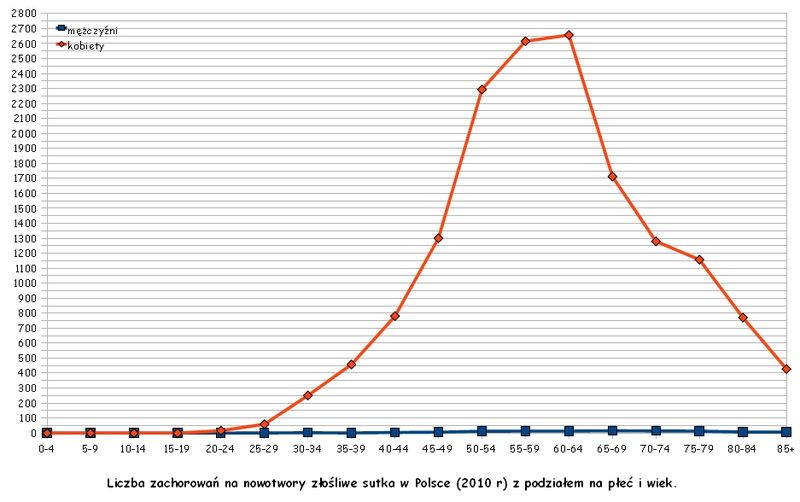

Rak sutka jest wykrywany zwykle jako macalne, niebolesne zgrubienie w piersi. Obecnie przesiewowe badania mammograficzne pozwalają na wykrycie raka zanim stanie się on dostępny badaniu palpacyjnemu. Inne objawy zwykle pojawiają się gdy guz jest już wyczuwalny, wczesnym objawem może być zaciągnięcie brodawki sutkowej, tzw. pępek rakowy. Zajęcie dróg chłonnych może być przyczyną miejscowego obrzęku limfatycznego, czego wyrazem jest tzw. objaw skórki pomarańczowej.

Metody dzięki którym lekarze mogą rozpoznać rozwój raka sutka możemy podzielić m.in na:

 - metody mammograficzne
 - ultrasonografia
 - palpacja
 - oraz wiele innych metod wspomagających

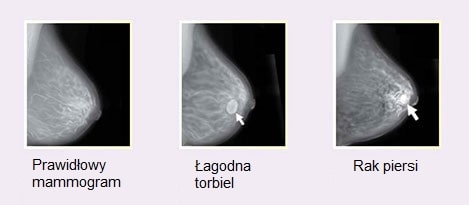

Leczenie raka piersi jest procesem wieloetapowym. Prowadzone powinno być przez zespół w składzie lekarskim składającym się m.in z chirurga onkologicznego, onkologa klinicznego, onkologa radioterapeuty, rehabilitanta oraz psychologa klinicznego.Takowy zespól ocenia kliniczny stopień zaawansowania rozwoju nowotworu. W zależności od niego wybierane jest postępowanie pierwotne–operacyjne, leczenie przedoperacyjne czy też leczenie paliatywne. Po ewentualnej operacji oceniany jest patologiczny stopień zaawansowania nowotworu, typ histologiczny raka oraz występowanie ważnych klinicznie receptorów – estrogenowych, progesteronowych, nadekspresji receptora dla nabłonkowego czynnika wzrostu (HER2).

Po zabiegu operacyjnym następuje ocena histopatologiczna usuniętego preparatu. W zależności od patologicznego stopnia zaawansowania oraz stanu pacjenta wybierana jest strategia leczenia uzupełniającego. Leczenie to możemy podzielić na różne typy:

 - radioterapia
 - chemoterapia
 - terapia celowana
 - hormonoterapia

Wykrycie rozwoju nowotworu sutka w odpowiednio wczesnym etapie rozwoju może mieć ogromny wpływ na zahamowanie nie tylko przerzutów, ale również dalszego rozwoju. Jednym z wielu sposobów profilaktycznych może być ocena pacjenta pod względem określonych cech w celu oszacowania prawdopodobieństwa obecności choroby. Biorąc ten fakt pod uwagę oraz ogromny rozwój metod uczenia maszynowego, na podstawie odpowiednich i reprezentatywnych danych stworzenie algorytmu, będącego w stanie ocenić prawdopodobieństwo obecności nowotworu u pacjenta może być pomocny zarówno dla lekarzy oraz dla pacjenta.

Naszym zadaniem będzie klasyfikacja raka sutka ze względu na tym łagodny z złośliwy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
wdbc = pd.read_csv("data/wdbc.csv")
wdbc

Orginanly opis zmiennych:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3. (3-32) Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [ ]:
wdbc = wdbc.drop(columns=['ID_number'])

Sprawdźmy teraz czy w naszych danych znajdują się jakies braki

In [ ]:
wdbc.info()

Przy klasyfikacji jednym z najwazniejszych pytań podczas eksploracyjnej analizy danych jest **zbalansowanie** zmiennej zaleznej a raczej jego brak. W przypadku niezbalansowanych danych dużo trudniej jest zbudować dobrze działający klasyfikator.

In [ ]:
counts = wdbc['Diagnosis'].value_counts()
percentages = counts / counts.sum() * 100

plt.bar(percentages.index, percentages.values)
plt.title('Percentage of Diagnosis Column')
plt.xlabel('X')
plt.ylabel('Percentage')
plt.show()

Kolejnym krokiem jest zbadanie rozkładów predyktorów.

In [ ]:
wdbc['Diagnosis'] =(wdbc['Diagnosis'] == 'M') * 1
wdbc_grouped = wdbc.groupby('Diagnosis')

for col in wdbc.columns[1:]:
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].set_title('Histogram of ' + col)
    axs[1].set_title('Box plot of ' + col)
    for i, (name, group) in enumerate(wdbc_grouped):
        axs[0].hist(group[col], alpha=0.5, label=name, density=True)
        axs[1].boxplot(group[col], positions=[i], labels=[name])
    axs[0].legend()
    plt.show()

Jak widać niektóre zmienne mają do siebie bardzo podobne rozkłady nalezy więc sprawdzić czy nie dochodzi do zjawiska współliniowości zmiennych. Budując model powinniśmy zwrócić uwagę na to czy nasze predyktory nie są współliniowe (jeden z predyktorów jest kombinacją liniową innych). Wprowadzanie współliniowych predyktorów powoduje przekazywanie identycznej informacji z wielu miejsc.

In [ ]:
corr_matrix = wdbc.drop(columns="Diagnosis").corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

Kolejnym krokiem EDA jest sprawdzenie wartości odstających -  **outlaierów**. Najprosszą metodą jest wygenerowanie box plotów. Na tym etapie analizy nalezałoby się zastanowić czy czy wartości wykraczające poza IQR należaloby usunąć.

## Modelowanie

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wdbc.drop(columns=["Diagnosis"]),
                                                    wdbc["Diagnosis"], test_size=0.2, random_state=42)

transformation_steps = [
    ('n', MinMaxScaler(), list(range(30)))
]
ct = ColumnTransformer(transformation_steps)
pipeline = Pipeline(
    steps=[
        ('smote', SMOTE()),
        ('transform', ct),
        ('model', SVC(kernel='rbf', probability=True))
    ])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
param_grid = {
    "model__gamma": [1, 2, 5, 10, 20]
}
grid_search = GridSearchCV(
    estimator=pipeline, param_grid=param_grid, cv=cv, scoring="f1_macro"
)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('ROC AUC score:', roc_auc_score(y_test, y_pred))

In [ ]:
probs = best_estimator.predict_proba(X_test)[:,1]
pred_df = pd.DataFrame({'Diagnosis': y_test, 'Probability': probs})
sns.histplot(data=pred_df, x='Probability', hue='Diagnosis', element='step', stat='density', bins = 50)

Aby znaleźć optymalny threshold (cutoff) zwyczajnie wybieramy jendą z metyk i sprawdzamy jaki threshld ją maksymalizuje:

In [ ]:
from sklearn.metrics import f1_score
thresholds = np.linspace(0, 1, num=100)
f1_scores = [f1_score(pred_df.Diagnosis, (pred_df.Probability >= threshold).astype(int)) for threshold in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print("Najlepszy threshold:", best_threshold)
pred_df["pred_cutoff_max_f1"] = pred_df.Probability > 0.5
pivot_table = pred_df.drop(columns=["Probability"]).pivot_table(index='pred_cutoff_max_f1', columns='Diagnosis', aggfunc=len, fill_value=0)
print(pivot_table)

Jeśli chcemy spojrzeć na wyniki dla każdego cutoffu możemy się posłużyć Krzywą ROC (receiver operating characteristic curve) i AUC.

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_df.Diagnosis, pred_df.Probability)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()